<a href="https://colab.research.google.com/github/16sl75/business-analytics-project_2021_08_18/blob/main/SomeUsefulPlots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## Exploring Marathon Finishing Times

Here we'll look at using Seaborn to help visualize and understand finishing results from a marathon.


In [ ]:
!curl -O https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  836k  100  836k    0     0  3346k      0 --:--:-- --:--:-- --:--:-- 3346k


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#plt.style.use('classic')
sns.set()



In [ ]:
data = pd.read_csv('marathon-data.csv')


# E1. Display the head of the data frame

In [ ]:
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


By default, Pandas loaded the time columns as Python strings (type ``object``); we can see this by looking at the ``dtypes`` attribute of the DataFrame:

In [ ]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [ ]:
data['hour']    = data['split'].apply(lambda x: x.split(":")[0])
data['minutes'] = data['split'].apply(lambda x: x.split(":")[1])
data['seconds']= data['split'].apply(lambda x: x.split(":")[2])
data['split_sec'] = data['hour'].astype(int)*60*60 + data['minutes'].astype(int)*60 +data['seconds'].astype(int)
data

## E.2 Let's fix this by providing a converter for the times:

In [ ]:
import datetime

def convert_time(s):
    h, m, s = map(int, s.split(":"))
    return datetime.timedelta(hours = h, minutes = m, seconds = s)

data = pd.read_csv('marathon-data.csv',
                   converters={'split':convert_time, 'final':convert_time})
data.head()

,age,gender,split,final
0,33,M,0 days 01:05:38,0 days 02:08:51
1,32,M,0 days 01:06:26,0 days 02:09:28
2,31,M,0 days 01:06:49,0 days 02:10:42
3,38,M,0 days 01:06:16,0 days 02:13:45
4,31,M,0 days 01:06:32,0 days 02:13:59


In [ ]:
list(map(int, "02:08:51".split(":")))

[2, 8, 51]

In [ ]:
def function(x):
  return x**2
list(map(function , [2,3,5,6]))

[4, 9, 25, 36]

In [ ]:
h, m, s = map(int, "02:08:51".split(":"))
datetime.timedelta(hours = h, minutes = m, seconds = s)

datetime.timedelta(0, 7731)

In [ ]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [ ]:
data.head()

,age,gender,split,final
0,33,M,0 days 01:05:38,0 days 02:08:51
1,32,M,0 days 01:06:26,0 days 02:09:28
2,31,M,0 days 01:06:49,0 days 02:10:42
3,38,M,0 days 01:06:16,0 days 02:13:45
4,31,M,0 days 01:06:32,0 days 02:13:59


In [ ]:
1e9

1000000000.0

In [ ]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

## E.3 That looks much better. For the purpose of our Seaborn plotting utilities, let's next add columns that give the times in seconds:

In [ ]:
data['split_sec'] = data['split'].astype(int)/1e9
data['final_sec'] = data['final'].astype(int)/1e9

data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0


## E.3 To get an idea of what the data looks like, we can plot a ``jointplot`` over the data: \
##Use jointplot() in seaborn 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


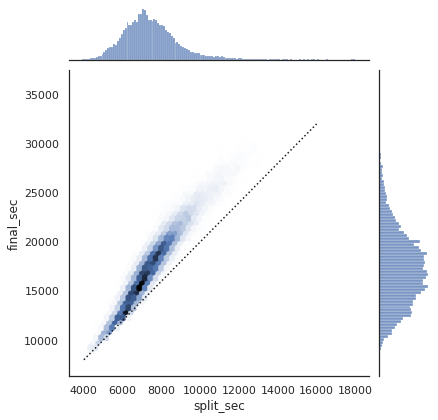

In [ ]:
sns.set()
with sns.axes_style('white'):
    g = sns.jointplot("split_sec", "final_sec", data, kind="hex")
    g.ax_joint.plot(np.linspace(4000, 16000),
                    np.linspace(8000, 32000), ':k')

The dotted line shows where someone's time would lie if they ran the marathon at a perfectly steady pace. The fact that the distribution lies above this indicates (as you might expect) that most people slow down over the course of the marathon.
If you have run competitively, you'll know that those who do the opposite—run faster during the second half of the race—are said to have "negative-split" the race.

Let's create another column in the data, the split fraction, which measures the degree to which each runner negative-splits or positive-splits the race:

## E.4 split_frac = 1 - 2*split_sec/final_sec

In [ ]:
data['split_frac'] = 1 - 2*data['split_sec']/data['final_sec']
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842


Where this split difference is less than zero, the person negative-split the race by that fraction.
Let's do a distribution plot of this split fraction:


## Seaborn distplot(), kde plot()
## also add a vertical line at split_frac = 0.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


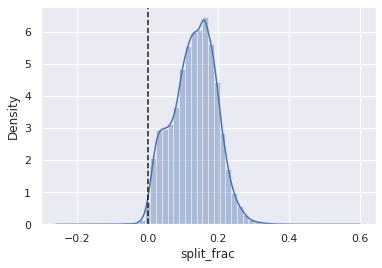

In [ ]:
ax = sns.distplot(data['split_frac'], kde=True)
plt.axvline(0, color="k", linestyle = '--')


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


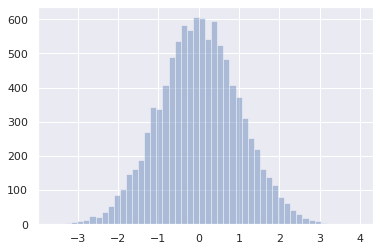

In [ ]:
sns.distplot(np.random.normal(0,1,10000), kde=False)

In [ ]:
# show number of participants with split_frac < 0
print(data[data['split_frac'] < 0].shape[0]/data.shape[0])

0.006738255033557047


In [ ]:
sum(data.split_frac < 0)

251

Out of nearly 40,000 participants, there were only 251 people who negative-split their marathon.

Let's see whether there is any correlation between this split fraction and other variables. We'll do this using a ``pairgrid``, which draws plots of all these correlations:

## pairgrid(hue='gender')

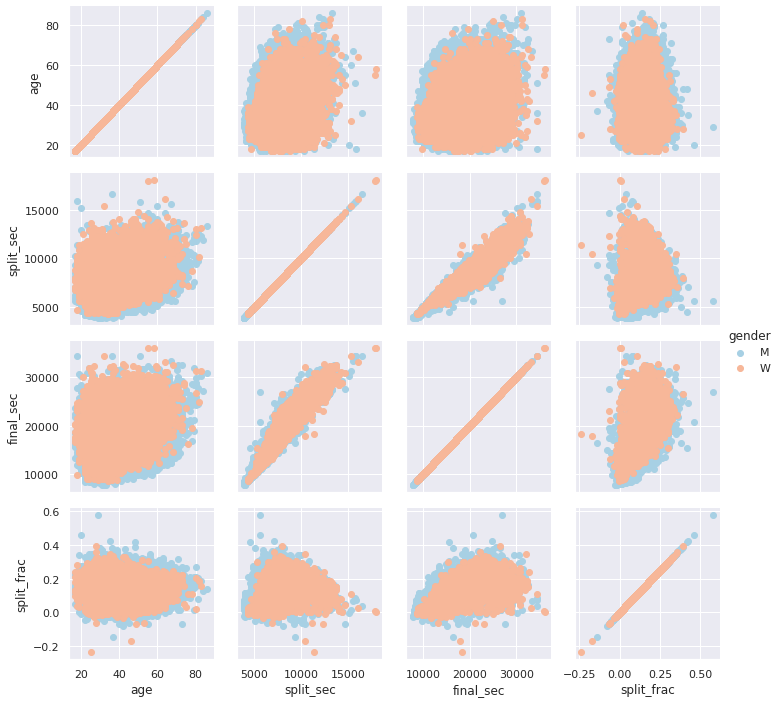

In [ ]:
g = sns.PairGrid(data, vars = ['age', 'split_sec', 'final_sec', 'split_frac'], hue='gender', palette='RdBu_r')
g.map(plt.scatter)
g.add_legend()

It looks like the split fraction does not correlate particularly with age, but does correlate with the final time: faster runners tend to have closer to even splits on their marathon time.
(We see here that Seaborn is no panacea for Matplotlib's ills when it comes to plot styles: in particular, the x-axis labels overlap. Because the output is a simple Matplotlib plot, however, the methods in [Customizing Ticks](04.10-Customizing-Ticks.ipynb) can be used to adjust such things if desired.)

The difference between men and women here is interesting. Let's look at the histogram of split fractions for these two groups:


## kdeplots()


In [ ]:
M_data = data[data['gender'] == "M"]
M_data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,01:05:38,02:08:51,3938.0,7731.0,-0.018756
1,32,M,01:06:26,02:09:28,3986.0,7768.0,-0.026262
2,31,M,01:06:49,02:10:42,4009.0,7842.0,-0.022443
3,38,M,01:06:16,02:13:45,3976.0,8025.0,0.009097
4,31,M,01:06:32,02:13:59,3992.0,8039.0,0.006842


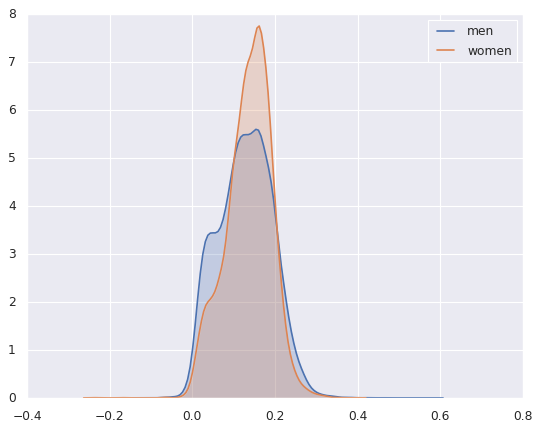

In [ ]:
M_data = data[data['gender'] == "M"]
W_data = data[data['gender'] == "W"]
sns.kdeplot(M_data['split_frac'], label="men", shade=True)
sns.kdeplot(W_data['split_frac'], label = "women", shade=True)


The interesting thing here is that there are many more men than women who are running close to an even split!
This almost looks like some kind of bimodal distribution among the men and women. Let's see if we can suss-out what's going on by looking at the distributions as a function of age.

A nice way to compare distributions is to use a *violin plot*

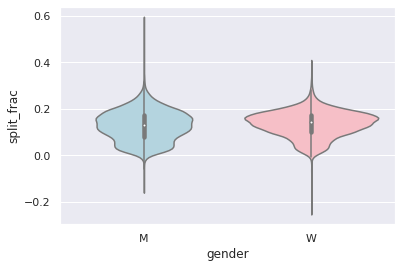

In [ ]:
ax = sns.violinplot(x="gender", y="split_frac", data=data, palette=['lightblue', 'lightpink'])


This is yet another way to compare the distributions between men and women.

Let's look a little deeper, and compare these violin plots as a function of age. We'll start by creating a new column in the array that specifies the decade of age that each person is in: \
# age_dec = age //10

In [ ]:
54/10

5.4

In [ ]:
data['age_dec'] = 10* (data['age'] // 10)
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097,30
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842,30


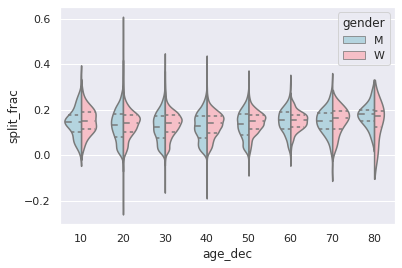

In [ ]:

ax = sns.violinplot(x="age_dec", y="split_frac", hue="gender",
                    data=data, split=True, inner='quartile', palette=['lightblue', 'lightpink'])


Looking at this, we can see where the distributions of men and women differ: the split distributions of men in their 20s to 50s show a pronounced over-density toward lower splits when compared to women of the same age (or of any age, for that matter).

Also surprisingly, the 80-year-old women seem to outperform *everyone* in terms of their split time. This is probably due to the fact that we're estimating the distribution from small numbers, as there are only a handful of runners in that range:

In [ ]:
data[(data['gender'] == "W") & (data['age'] >= 80)]

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
35915,82,W,0 days 02:48:26,0 days 06:55:31,10106.0,24931.0,0.189282,80
36635,80,W,0 days 03:37:23,0 days 07:24:30,13043.0,26670.0,0.021897,80
37214,83,W,0 days 03:39:09,0 days 08:39:38,13149.0,31178.0,0.156521,80
37215,80,W,0 days 03:26:44,0 days 08:39:42,12404.0,31182.0,0.204413,80


Back to the men with negative splits: who are these runners? Does this split fraction correlate with finishing quickly? We can plot this very easily. We'll use ``regplot``, which will automatically fit a linear regression to the data:

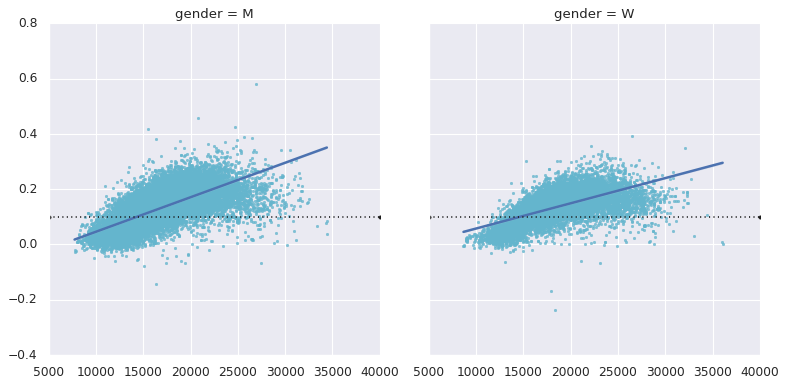

Apparently the people with fast splits are the elite runners who are finishing within ~15,000 seconds, or about 4 hours. People slower than that are much less likely to have a fast second split.